<a href="https://colab.research.google.com/github/nahata2006/la_rel-ve_du_futur/blob/main/Activite_1_Nim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Activité 1 : Introduction à l'apprentissage par renforcement à l'aide du jeu de NIM**
---

**Préambule**
---

Dès les débuts de l'intelligence artificielle, les chercheurs dans ce domaine se sont rapidement intéressés aux jeux. Dans les années 60, le terme d'apprentissage automatique (ou machine learning) est utilisé pour l'une des premières fois chez IBM lors de la mise au point d'un programme capable de jouer au jeu de dames. En 1997, c'est la victoire de Deep Blue contre le champion du monde des échecs qui marquera les esprits. En 2016, AlphaGo réalise un exploit encore plus grand en battant le champion du monde du jeu de Go (bien plus complexe que le jeu d'échec en terme de nombre de stratégies possibles). La légende raconte qu'AlphaGo aurait eu besoin de 3 jours pour apprendre à jouer au jeu de Go et découvrir alors la meilleure "stratégie gagnante".

Lors d'un apprentissage par renforcement, un **agent** (ici la machine) réalise des actions au hasard qui dépendent de l'**état de l'environnement** (par exemple l'état du plateau de jeu). Ces **actions** modifieront l'état de l'environnement puis, en fonction des résultats obtenus (victoire ou défaite), **les actions effectuées seront récompensées ou punies**. Techniquement **cela sera fait en augmentant ou en diminuant la probabilité qu'un tel choix soit fait à nouveau**. Au final, l'agent cherchera donc à adopter une stratégie décisionnelle optimale lui permettant de maximiser les récompenses reçues.

Dans cette série d'activités, on vous propose de découvrir le principe de l'apprentissage par renforcement à travers une version simplifiée du jeu de Nim. Au moyen de cet apprentissage, vous découvrirez comment l'ordinateur fait pour apprendre et comment, derrière cet aspect au premier abord magique et fascinant, se trouve un monde mathématique logique … mais tout aussi fascinant !

Cette activité est découpée en 4 temps :


*   Dans un premier temps, vous jouerez quelques parties de jeu de Nim simplifié pour essayer d'en extraire une stratégie gagnante.
*   Dans un second temps, vous mettrez au point une machine capable d'apprendre et de gagner (presque) tout le temps, et ce sans utiliser d'ordinateur. Vous découvrirez alors les notions d'agents, d'états, de fonction de transition, de récompense et de punition qui sont à la base de l'apprentissage par renforcement.
*   Dans un troisième temps, vous réutiliserez ces notions au sein d'un programme "clé en main" qui vous permettra de tester certaines hypothèses et vous amèneront à vous interroger sur les paramètres de l'apprentissage par renforcement.
*   Dans un quatrième temps enfin, vous aboutirez et utiliserez l'algorithme de Q-learning dans le cadre du jeu de Nim, algorithme massivement utilisé de nos jours dans l'apprentissage par renforcement.

Chaque étape de l'activité sera ponctuée de diverses sous-étapes :
- Des parties "explicatives" : dans lesquelles les notions sont introduites, et qui vous amèneront à vous interroger sur ces notions.
- Des parties "à tester" : dans lesquelles vous serez amenées à essayer, expérimenter et programmer.
- Des parties "discussion" : durant lesquelles vous échangerez entre vous pour faire le point sur ce que vous avez ou n'avez pas compris. Il vous est recommandé de garder une trace écrite de vos réflexions, de vos conclusions et de vos remarques, même de façon informelle.
Les discussions feront appel à votre imagination, votre réflexion et votre autonomie, et nécessiteront souvent de tester vos hypothèses. En cas de flou total, un intervenant est là pour venir vous aider.



📌**Discussion :**

*Pourquoi la découverte de stratégies gagnantes aux jeux (échecs, dames, go, nim, poker, morpion, etc.) est-elle un bon terrain d'entraînement pour les algos en machine learning ?*






**Premier temps : Les règles du jeu de Nim**
---


**Règles :**
-	Le jeu se joue à 2 joueurs.
-	On dispose de 8 allumettes, placées horizontalement de gauche à droite.
-	Un joueur commence : il peut retirer 1 ou 2 allumettes (en partant de la gauche).
-	Puis c'est au tour du joueur suivant qui peut lui aussi retirer 1 ou 2 allumettes (toujours en partant de la gauche).
-	Celui qui retire la dernière allumette toute à droite a gagné.



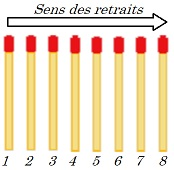

📌**A votre tour !**
>-	*Réaliser 2-3 parties du jeu de Nim entre vous*
>-	*Essayez de gagner le plus souvent possible !*


📌**Discussion :**

>Quelle stratégie avez-vous trouvé pour permettre au joueur qui commence de gagner à coup sûr ? Si vous n'en n'avez pas trouvé, cela ne sera pas bloquant pour la suite (car la machine la découvrira pour vous !).


**Deuxième temps : Construction de la machine**
---
*© L'idée initiale de cette activité a été élaborée partir des travaux de Malika More (UCA), elle-même inspirée d'une idée d'Éric Duchêne (Univ.Lyon 1) et Aline Parreau*

Ce que vous apprendrez : mécanismes de l'apprentissage par renforcement, système de récompense lors de l'apprentissage, notion d'agent.


Dans cette partie vous allez construire une machine capable de découvrir "seule" la stratégie gagnante du jeu de Nim grâce à un apprentissage par renforcement.
Les **actions** de la "machine apprenante" (l'**agent**) seront modélisées par des billes de couleur qui seront tirées au hasard : jaune (la machine retire 1 allumette) et rouge (la machine retire 2 allumettes).

📌**Mise en place de la machine :**
- Disposer 8 gobelets blancs que vous numéroterez de 1 à 8 à l'aide d'un feutre, placés horizontalement de gauche à droite (1 à gauche, 8 à droite).
- Devant chacun de ces gobelets, placer une allumette.
- Dans les gobelets de 1 à 7, placer 2 billes rouges + 2 billes jaunes : la machine aura donc initialement 1 chance sur 2 de retirer soit 1 allumettes (si elle tire une boule jaune) soit 2 allumettes (si elle tire une boule rouge).
- Dans le gobelet n°8, placer 2 billes jaunes : à chaque tour la machine ne pourra ici retirer qu'une seule allumette !
- Derrière chaque gobelet blanc, placer un gobelet transparent (que nous appellerons ensuite le gobelet de tirage).
- Enfin, garder à part 2 gobelets de réserve (il y en a un rouge et un jaune) : placer 5 billes rouges dans l'un et 5 billes jaunes dans l'autre.


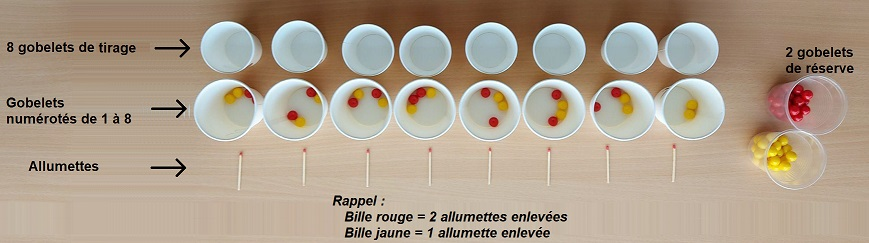

**Répartition des rôles :**
- Choisir 1 ou 2 personnes qui feront office de joueuses. Ces joueuses incarnent les expertes qui connaissent la meilleure stratégie, et se placeront du côté des gobelets de tirage.
- Choisir 1 personne qui fera office d'agent. Cette personne incarne la machine qui va apprendre à jouer. Cette personne se place du côté des gobelets numérotés contenant les billes.
- Choisir 1 personne qui fera office d'opératrice. C'est elle qui effectuera les tirages au sort et s'assurera qu'aucune erreur n'est commise durant les manipulations.


**Déroulement d'une partie :**
- **La machine commence tout le temps :** c'est elle qui enlèvera les premières allumettes (ce choix sera discuté plus tard…).

Lorsque c'est le tour de la machine :
- L'opératrice tire au hasard une bille dans le gobelet numéroté situé devant l'allumette la plus à gauche. Par exemple, s'il ne reste que 6 allumettes alors l'opératrice tire une bille au hasard dans le gobelet n°3.
- La bille est placée dans le gobelet de tirage correspondant.
- La couleur de la bille indique le nombre d'allumettes qu'il faut enlever : 1 allumette (bille jaune) ou 2 allumettes (bille rouge). Les allumettes sont alors mises de côté.

Lorsque c'est le tour de l'humain :
- L'humain peut retirer le nombre d'allumettes qu'il souhaite pour pouvoir gagner.
Remarque : Il est également recommandé de "perdre" volontairement de temps en temps.
- Aucune bille n'est enlevée lorsque c'est l'humain qui joue.
- Puis la machine reprendra son tour à partir du gobelet où se trouve l'allumette la plus à gauche.

Une fois que la dernière allumette enlevée (partie terminée) :
- Le gagnant est celui qui a retiré la dernière allumette.
- Si la machine a gagné alors ses actions doivent être récompensées : dans tous les gobelets de tirage contenant une bille la machine rajoute une bille de la même couleur (prise depuis la réserve), puis verse le contenu de chaque gobelet de tirage dans le gobelet numéroté qui lui fait face : elle aura ainsi plus de chance de reproduire ce choix à nouveau.
- Si la machine a perdu alors ses actions doivent être punies : elle replace toutes les billes des gobelets de tirage dans les réserves.
- Pendant ce temps, l'opératrice complète la grille des scores en indiquant qui, de l'humain ou de la machine, qui a gagné.
- Redisposez à nouveau les allumettes et recommencez ainsi jusqu'à ce que la machine gagne (quasiment) tout le temps.

*Remarque : S'il arrive à un moment qu'un gobelet numéroté est entièrement vide (il n'est plus possible de piocher dedans) alors replacer dans ce gobelet 2 billes rouges + 2 billes jaunes (ou seulement 2 billes jaunes dans le verre n°8).*


**A votre tour !**
>- Réaliser une première partie de chauffe : si quelque chose n'est pas clair dans le protocole, appelez quelqu'un pour vous aider afin de ne pas perdre de temps !
>- Une fois que vous avez compris le principe, réalisez une quinzaine de parties (cela vous prendra environ 15 minutes) : notez bien le gagnant à chaque partie sur la grille de scores ci-dessous ou sur une feuille. Si vous avez "mal joué" ou si vous avez manqué de chance, il sera peut-être nécessaire de pousser à 20 parties. Si vous avez de la chance, cela sera plié en une dizaine de parties !
>- Vous pouvez intervertir vos rôles si vous le souhaitez en cours de partie pour rendre l'apprentissage de la machine moins répétitif pour vous.


>* Gagnant partie 1 : à compléter
>* Gagnant partie 2 : à compléter
>* Gagnant partie 3 : à compléter
>* Gagnant partie 4 : à compléter
>* Gagnant partie 5 : à compléter
>* Gagnant partie 6 : à compléter
>* Gagnant partie 7 : à compléter
>* Gagnant partie 8 : à compléter
>* Gagnant partie 9 : à compléter
>* Gagnant partie 10 : à compléter
>* Gagnant partie 11 : à compléter
>* Gagnant partie 12 : à compléter
>* Gagnant partie 13 : à compléter
>* Gagnant partie 14 : à compléter
>* Gagnant partie 15 : à compléter
...

📌**Discussion :**
>- En combien de parties estimez-vous que la machine a "appris à gagner" ?
>- Observez le contenu des gobelets numérotés à la fin de l'apprentissage : comparer ces contenus à la stratégie gagnante. Que constatez-vous ?
>- Pourquoi peut-on ici parler d'un apprentissage de la machine ? Pourquoi parle-t-on d'apprentissage par renforcement ?
>- La machine aurait-elle pu apprendre si l'humain en face ne connaissait pas en amont la stratégie gagnante ?
>- Selon vous, quels sont les paramètres qu'on pourrait modifier et qui impacteraient (dans un sens ou dans l'autre) la vitesse d'apprentissage de la machine ?

>*Remarque : une partie de vos propositions sera mise en oeuvre et testée dans les parties qui suivent.*


**Troisième temps : améliorer l'apprentissage**
---
*© Le script retravaillé pour cette partie a été inspiré des travaux d'Olivier Druet (CNRS, pour la maison des mathématiques et de l'informatique).*

Ce que vous apprendrez ici : notions d'état et d'action, notion de décision, paramètres de l'apprentissage, politique epsilon-greedy


L'intérêt du machine learning est de permettre à la machine d'apprendre "seule", c’est-à-dire sans intervention humain systématique durant son apprentissage (imaginez un jeu de Nim avec 1 million d'allumettes …). Une solution est donc de faire jouer la machine contre elle-même : non seulement cette pratique permet de s'affranchir de l'humain pendant l'apprentissage, mais elle permet aussi à priori à la machine d'apprendre plus vite (puisqu'elle apprendra à chaque tour de jeu).

On considère le script ci-dessous reprenant exactement le déroulement de partie que vous avez suivi précédemment, en utilisant toutefois une 2ème machine apprenante à la place de l'experte humaine.

L'objectif ici est de faire tourner ce script en modifiant certains paramètres pour tester les hypothèses évoquées lors de votre discussion précédente.
Pour tester ce script, vous pourrez cliquer sur l'icône ▶ qui se situe en haut à gauche de sa cellule ou appuyer sur Ctrl+Entrée après avoir sélectionné la cellule de code. Quand vous avez fini de tester le programme, cliquez sur ◼ pour l'interrompre et ne pas le laisser continuer en arrière plan. La première cellule permet de définir les fonctions, et la cellule qui suit lance le jeu.

Des explications sur ce script sont fournies après celui-ci (rassurez-vous, il ne sera pas nécessaire de le comprendre intégralement !).
Dans ce script, l'état dans lequel se trouve la machine à un instant t est noté `st` : lorsque la partie commence, la machine est dans l'état `0`. A chaque fois qu'une allumette est enlevée, l'état augmente de `1`. Lorsqu'il atteint le nombre d'allumettes de départ, la partie est terminée.

*Remarque : le script est assez long, vous pouvez si vous le préférez utiliser un éditeur Python extérieur pour l'exécuter ou un éditeur en ligne : [Editeur trinket ](https://trinket.io/features/python3).  
Ce script `nim_IavsIa.py` est disponible si besoin dans le drive partagé.*


In [ ]:
import random
import time

################### initialisation de la machine ##############################
nombre_allumettes = 8   ### nombre d'allumettes de départ

board = []              ### le plateau de jeu
boulesjaunes = []       ### correspond au nombre de boules jaunes dans chaque gobelet
boulesrouges = []       ### correspond au nombre de boules rouges dans chaque gobelet
tirage = [[0,0] for i in range(nombre_allumettes)]
for i in range(nombre_allumettes):
    boulesjaunes.append(2)
    boulesrouges.append(2)
boulesrouges[nombre_allumettes-1] = 0 #### il ne faut pas mettre de boules rouges dans le dernier gobelet


################## définition et affichage de l'état du jeu #############
def affichage(nb_allu):
    """ Réalise un affichage en console du plateau de jeu """
    board = []
    for i in range(nombre_allumettes-nb_allu):
        board.append(" ")
    for i in range(nb_allu):
        board.append("|")
    print("\n\n------------------------------------------------------------------------------------------------")
    if nb_allu == 1:
        texte = "allumette"
    else:
        texte = "allumettes"
    print(f"Il y reste {nb_allu} {texte} : ", *board, sep="   ")
    print("------------------------------------------------------------------------------------------------")

###############################################################################

################ calcul de la probabilité de gain du joueur 1 (machine) #######
################ contre le joueur 2 (machine) #################################

def proba_gain8(boulesjaunes,boulesrouges):
    """ Pour 8 allumettes, renvoie la probabilité de gain de la machine
    lorsqu'elle commence la partie
    """
    j = [0] * nombre_allumettes
    r = [0] * nombre_allumettes
    table_proba = [0] * nombre_allumettes
    for i in range(nombre_allumettes):
        j[i] = boulesjaunes[i]/(boulesjaunes[i]+boulesrouges[i])
        r[i] = boulesrouges[i]/(boulesjaunes[i]+boulesrouges[i])
    table_proba[7] = 1 ### s'il reste 1 allumette, le joueur gagne
    table_proba[6] = r[6] ### s'il reste 2 allumettes, le joueur gagne s'il joue rouge
    table_proba[5] = j[5]*j[6]
    table_proba[4] = r[4]*j[6] + j[4]*r[5] + j[4]*j[5]*r[6]
    table_proba[3] = r[3]*r[5]*table_proba[7] + (r[3]*j[5]+j[3]*r[4])*table_proba[6]+j[3]*j[4]*table_proba[5]
    table_proba[2] = r[2]*r[4]*table_proba[6] + (r[2]*j[4]+j[2]*r[3])*table_proba[5]+j[2]*j[3]*table_proba[4]
    table_proba[1] = r[1]*r[3]*table_proba[5] + (r[1]*j[3]+j[1]*r[2])*table_proba[4]+j[1]*j[2]*table_proba[3]
    table_proba[0] = r[0]*r[2]*table_proba[4] + (r[0]*j[2]+j[0]*r[1])*table_proba[3]+j[0]*j[1]*table_proba[2]
    return table_proba[0]


""" ################ Programme principal : jeu + renforcement ################# """
def decision(st):
    """ Prend en paramètre l'état de l'environnement et renvoie le nombre
    d'allumettes prises, en tenant compte de la probabilité liée au nombre
    de boules présentes dans le gobelet
    """
    if st == nombre_allumettes - 1:
        action = 1
    else:
        somme = boulesjaunes[st] + boulesrouges[st]
        boulehasard = random.randint(1,somme)
        if boulehasard <= boulesjaunes[st]:
            action = 1
        else:
            action = 2
    return action

def apprentissage(gagnant, recomp):
    """ Récompense les tirages gagnants et punit les tirages perdants en
    modifiant le nombre de boules rouges et jaunes dans chaque gobelet
    """
    if gagnant=='machine1':     ###récompense des tirages de la machine 1 et punition de ceux de la machine 2
        for i in range(nombre_allumettes):
            if tirage[i][0] == 1:
                boulesjaunes[i] = boulesjaunes[i] + recomp
            if tirage[i][0] == 2:
                boulesrouges[i] = boulesrouges[i] + recomp
            if tirage[i][1] == 1:
                boulesjaunes[i] = max(0, boulesjaunes[i] - recomp)
            if tirage[i][1] == 2:
                boulesrouges[i] = max(0, boulesrouges[i] - recomp)
    else:        ###récompense des tirages de la machine 2 et punition de ceux de la machine 1
        for i in range(nombre_allumettes):
            if tirage[i][1] == 1:
                boulesjaunes[i] = boulesjaunes[i] + recomp
            if tirage[i][1] == 2:
                boulesrouges[i] = boulesrouges[i] + recomp
            if tirage[i][0] == 1:
                boulesjaunes[i] = max(0, boulesjaunes[i] - recomp)
            if tirage[i][0] == 2:
                boulesrouges[i] = max(0, boulesrouges[i] - recomp)
    for i in range(nombre_allumettes):   ### On vide tous les gobelets de tirage avant de recommencer une partie
        tirage[i][0] = 0
        tirage[i][1] = 0

def jeu():
    compteur_partie = 0
    nb_parties_a_jouer = 1
    rapide = False
    tps_pause = 0.5     #Temps d'attente entre chaque affichage, en seconde
    time.sleep(1)
    recomp = 1          #Valeur de la récompense et de la punition (boules ajoutées ou enlevées)
    while nb_parties_a_jouer != 0:
        joueur = random.choice(["machine1", "machine2"])      #C'est ici qu'on choisit qui commence, les choix peuvent être machine1 ou machine2
        st = 0                                   #L'état st correspond au gobelet (numéroté à partir de 0 au lieu de 1)
        while st < nombre_allumettes:            #La partie s'arrête lorsque l'état final vaut le nombre d'allumettes initial
            if not rapide:
                affichage(nombre_allumettes - st)    ### Affiche le plateau de jeu
                time.sleep(tps_pause)
            if joueur == 'machine1':                 ### cas où c'est à la machine 1 de jouer
                action = decision(st)                ### L'agent prend une décision
                stp1 = st + action                   ### stp1 correspond à l'état à l'instant t + 1 dans lequel se trouve le jeu, après son action
                tirage[st][0] = action               ### Le nombre de billes correspond est placé dans le gobelet de tirage
                if not rapide:
                    print(f"La machine 1 choisit de retirer {action} allumette(s).")
                    time.sleep(tps_pause)
                if stp1 >= nombre_allumettes:
                    gagnant = 'machine1'
                else:
                    joueur = 'machine2'
            elif joueur == 'machine2':           ### cas où c'est à la machine 2 de jouer
                action = decision(st)            #tester action = random.randint(1,2) pour que la machine 2 joue au hasard
                stp1 = st + action
                tirage[st][1] = action
                if not rapide:
                    print(f"La machine 2 choisit de retirer {action} allumette(s).")
                    time.sleep(tps_pause)
                if stp1 >= nombre_allumettes:
                    gagnant = 'machine2'
                else:
                    joueur = 'machine1'
            st = stp1
        compteur_partie += 1
    ########### fin de la partie ###############

    ########### annonce des résultats ##########
        print("\n----------------------------------------------------------------------------")
        if gagnant == 'machine1':
            print(f"Partie n°{compteur_partie} : La machine 1 a gagné")
            print(f"Les coups de la machine 1 sont récompensés et ceux de la machine 2 sont punis de {recomp} boule(s)")

        else:
            print(f"Partie n°{compteur_partie} : La machine 2 a gagné")
            print(f"Les coups de la machine 1 sont punis et ceux de la machine 2 sont récompensés de {recomp} boule(s)")

    ######### Apprentissage : récompense ou punition de lordoinateur #########
        if gagnant=='machine1':
            apprentissage('machine1', recomp)
        else:
            apprentissage('machine2', recomp)

    ####### réinitialisation des verres éventuellement vides à la fin du tour ######################
        for i in range(nombre_allumettes):
            if (boulesjaunes[i] == 0) and (boulesrouges[i] == 0):
                boulesjaunes[i] = 2
                boulesrouges[i] = 2

    ####### Affichage de la probabilité de gagner pour l'ordinateur pour 8 allumettes ############
        if nombre_allumettes == 8:
            pourcentage_gain = round(100*proba_gain8(boulesjaunes,boulesrouges),1)
            if compteur_partie == 1:
                texte = "partie"
            else:
                texte = "parties"
            print(f"Après {compteur_partie} {texte}, la probabilité que l'ordinateur gagne à coup sûr lorsqu'il commence est de {pourcentage_gain}%")
        print("----------------------------------------------------------------------------\n")

    ######## affichage de l'état des verres #######################
        for i in range(nombre_allumettes):
            print(f"Verre n°{i+1} : {boulesjaunes[i]} boules jaunes et {boulesrouges[i]} boules rouges.")

    ############ relance de l'entrainement #################
        nb_parties_a_jouer -= 1
        if nb_parties_a_jouer == 0:
            another_go = input("\nCombien de nouvelles parties voulez-vous relancer (0-10) ? ")
            while not another_go.isdigit() or not 0 <= int(another_go) <= 10:
                print("\nChoix invalide. Recommencez !")
                another_go = input("\nCombien de nouvelles parties voulez-vous lancer (0-10) ? ")
            nb_parties_a_jouer = int(another_go)
            rapide = nb_parties_a_jouer > 1

    print("######## Fin d'entrainement  ######")

print("Fonctions et paramètres correctement chargés")

In [ ]:
jeu()

📌**A votre tour !**

>* Prendre le temps de comprendre ce que font les fonctions `decision(st)` et `apprentissage(gagnant)` et d'en discuter entre vous.
>* Exécuter une première fois ce programme pour le voir fonctionner : à la fin de cette première partie, constater le contenu des verres ainsi que le pourcentage de chance de gagner de l'ordinateur à la prochaine partie s'il commence en premier.
>* Relancer une seconde fois ce programme et observez les variations.
>* Vous pouvez ensuite le relancer directement autant de fois que vous voulez (un affichage accéléré est prévu quand vous lancez plus d'une partie !)
>* Vous pouvez également modifier le nombre d'allumettes de départ pour voir si la machine parvient néanmoins à trouver la stratégie gagnante.


📌**Discussion :**

>- Discutez des résultats observés. Cela vous semble-t-il cohérent ? Remarquez les variations du nombre de boules dans chaque gobelet lorsqu'on relance des parties : comment relier cette variation à l'apprentissage de la machine ?
>- En regardant sur les probabilités de gagner de la machine (avec 8 allumettes), constatez-vous que l'apprentissage se fait de façon monotone ? Pourquoi selon vous ?
>- La valeur de la récompense a-t-il un effet (positif/négatif) sur l'apprentissage ? Pourquoi le choix de cette valeur est-il un choix important (notamment dans un cas plus complexe qu'un jeu de Nim) ?
>- L'instruction `joueur = random.choice(["machine1", "machine2"])` permet de tirer au hasard qui commence. Ce choix du premier joueur impacte-t-il la vitesse d'apprentissage ? N'hésitez pas à tester votre hypothèse.
>- Le fait que la machine 2 joue au hasard ou adopte au contraire la meilleure stratégie a-t-il un impact sur l'apprentissage ? Comment le tester dans le programme ?


Un des problèmes importants exposé ici (et qui est rencontré lors d'un apprentissage par renforcement) est que, lorsque les probabilités d'une action grandissent, les autres actions ne sont quasiment plus envisagées par l'agent (ici l'ordinateur qui apprend) : par exemple, s'il y a 10 boules rouges et 1 boule jaune à un instant $t$ alors les possibilités offertes par le choix d'une boule jaune ne sont quasiment plus envisagées par la machine.
Cela peut poser d'importants problèmes car la machine peut alors s'engager dans un apprentissage qui n'est pas optimal.


📌**Discussion :**
>- Lorsqu'il y a 8 allumettes de départ, comment expliquez-vous ce qui se passe dans le verre n°2 ? Quelles conséquences cela pourrait-il avoir sur l'apprentissage ?
>- Comment pourrait-on régler ce problème ?

*Si vous pensez avoir une solution permettant de régler le problème précédent, mettez-la en œuvre.
Sinon, la suite vous exposera une méthode qui est classiquement employée dans l'apprentissage par renforcement.*



Une façon classique de faire est d'intervenir au moment de la prise de décision de la machine : plutôt que de choisir systématiquement l'action à effectuer à partir des probabilités (on appelle cela l'**exploitation**) alors on peut imposer à la machine que "de temps en temps", elle choisira totalement au hasard parmi les possibilités offertes (on appelle cela l'**exploration**). Cette démarche s'appelle la politique **epsilon-greedy** (introduit par Watkins en 1989) et qu'on pourrait traduire par "politique epsilon-gloutonne" (mais ça perd un peu à la traduction !)

Dans le cas du jeu de Nim par exemple, on peut imposer à la machine de faire de l'exploitation 70% du temps, et de faire de l'exploration les 30% restants, on aurait alors un ε = 30.


📌**A votre tour !**

>*Remarque : le programme précédent a été recopié à nouveau ci-dessous.*
>-	Dans la fonction `jeu()`, à quel endroit faut-il modifier le programme pour que la machine 1 effectue de temps en temps une exploration et le reste du temps une exploitation dans le choix de l'action à effectuer ?

>*Remarque : seule 1 instruction est concernée par cette modification. Inutile d'envisager de modifier tout le programme !*
>-	Modifier le programme en conséquence et testez-le


In [ ]:
import random
import time

################### initialisation de la machine ##############################
nombre_allumettes = 8   ### nombre d'allumettes de départ

board = []              ### le plateau de jeu
boulesjaunes = []       ### correspond au nombre de boules jaunes dans chaque gobelet
boulesrouges = []       ### correspond au nombre de boules rouges dans chaque gobelet
tirage = [[0,0] for i in range(nombre_allumettes)]
for i in range(nombre_allumettes):
    boulesjaunes.append(2)
    boulesrouges.append(2)
boulesrouges[nombre_allumettes-1] = 0 #### il ne faut pas mettre de boules rouges dans le dernier gobelet


################## définition et affichage de l'état du jeu #############
def affichage(nb_allu):
    """ Réalise un affichage en console du plateau de jeu """
    board = []
    for i in range(nombre_allumettes-nb_allu):
        board.append(" ")
    for i in range(nb_allu):
        board.append("|")
    print("\n\n------------------------------------------------------------------------------------------------")
    if nb_allu == 1:
        texte = "allumette"
    else:
        texte = "allumettes"
    print(f"Il y reste {nb_allu} {texte} : ", *board, sep="   ")
    print("------------------------------------------------------------------------------------------------")

###############################################################################

################ calcul de la probabilité de gain du joueur 1 (machine) #######
################ contre le joueur 2 (machine) #################################

def proba_gain8(boulesjaunes,boulesrouges):
    """ Pour 8 allumettes, renvoie la probabilité de gain de la machine
    lorsqu'elle commence la partie
    """
    j = [0] * nombre_allumettes
    r = [0] * nombre_allumettes
    table_proba = [0] * nombre_allumettes
    for i in range(nombre_allumettes):
        j[i] = boulesjaunes[i]/(boulesjaunes[i]+boulesrouges[i])
        r[i] = boulesrouges[i]/(boulesjaunes[i]+boulesrouges[i])
    table_proba[7] = 1 ### s'il reste 1 allumette, le joueur gagne
    table_proba[6] = r[6] ### s'il reste 2 allumettes, le joueur gagne s'il joue rouge
    table_proba[5] = j[5]*j[6]
    table_proba[4] = r[4]*j[6] + j[4]*r[5] + j[4]*j[5]*r[6]
    table_proba[3] = r[3]*r[5]*table_proba[7] + (r[3]*j[5]+j[3]*r[4])*table_proba[6]+j[3]*j[4]*table_proba[5]
    table_proba[2] = r[2]*r[4]*table_proba[6] + (r[2]*j[4]+j[2]*r[3])*table_proba[5]+j[2]*j[3]*table_proba[4]
    table_proba[1] = r[1]*r[3]*table_proba[5] + (r[1]*j[3]+j[1]*r[2])*table_proba[4]+j[1]*j[2]*table_proba[3]
    table_proba[0] = r[0]*r[2]*table_proba[4] + (r[0]*j[2]+j[0]*r[1])*table_proba[3]+j[0]*j[1]*table_proba[2]
    return table_proba[0]


""" ################ Programme principal : jeu + renforcement ################# """
def decision(st):
    """ Prend en paramètre l'état de l'environnement et renvoie le nombre
    d'allumettes prises, en tenant compte de la probabilité liée au nombre
    de boules présentes dans le gobelet
    """
    if st == nombre_allumettes - 1:
        action = 1
    else:
        somme = boulesjaunes[st] + boulesrouges[st]
        boulehasard = random.randint(1,somme)
        if boulehasard <= boulesjaunes[st]:
            action = 1
        else:
            action = 2
    return action

def apprentissage(gagnant, recomp):
    """ Récompense les tirages gagnants et punit les tirages perdants en
    modifiant le nombre de boules rouges et jaunes dans chaque gobelet
    """
    if gagnant=='machine1':     ###récompense des tirages de la machine 1 et punition de ceux de la machine 2
        for i in range(nombre_allumettes):
            if tirage[i][0] == 1:
                boulesjaunes[i] = boulesjaunes[i] + recomp
            if tirage[i][0] == 2:
                boulesrouges[i] = boulesrouges[i] + recomp
            if tirage[i][1] == 1:
                boulesjaunes[i] = max(0, boulesjaunes[i] - recomp)
            if tirage[i][1] == 2:
                boulesrouges[i] = max(0, boulesrouges[i] - recomp)
    else:        ###récompense des tirages de la machine 2 et punition de ceux de la machine 1
        for i in range(nombre_allumettes):
            if tirage[i][1] == 1:
                boulesjaunes[i] = boulesjaunes[i] + recomp
            if tirage[i][1] == 2:
                boulesrouges[i] = boulesrouges[i] + recomp
            if tirage[i][0] == 1:
                boulesjaunes[i] = max(0, boulesjaunes[i] - recomp)
            if tirage[i][0] == 2:
                boulesrouges[i] = max(0, boulesrouges[i] - recomp)
    for i in range(nombre_allumettes):   ### On vide tous les gobelets de tirage avant de recommencer une partie
        tirage[i][0] = 0
        tirage[i][1] = 0

def jeu():
    compteur_partie = 0
    nb_parties_a_jouer = 1
    rapide = False
    tps_pause = 0.5     #Temps d'attente entre chaque affichage, en seconde
    time.sleep(1)
    recomp = 1          #Valeur de la récompense et de la punition (boules ajoutées ou enlevées)
    while nb_parties_a_jouer != 0:
        joueur = random.choice(["machine1", "machine2"])      #C'est ici qu'on choisit qui commence, les choix peuvent être machine1 ou machine2
        st = 0                                   #L'état st correspond au gobelet (numéroté à partir de 0 au lieu de 1)
        while st < nombre_allumettes:            #La partie s'arrête lorsque l'état final vaut le nombre d'allumettes initial
            if not rapide:
                affichage(nombre_allumettes - st)    ### Affiche le plateau de jeu
                time.sleep(tps_pause)
            if joueur == 'machine1':                 ### cas où c'est à la machine 1 de jouer
                action = decision(st)                ### L'agent prend une décision
                stp1 = st + action                   ### stp1 correspond à l'état à l'instant t + 1 dans lequel se trouve le jeu, après son action
                tirage[st][0] = action               ### Le nombre de billes correspond est placé dans le gobelet de tirage
                if not rapide:
                    print(f"La machine 1 choisit de retirer {action} allumette(s).")
                    time.sleep(tps_pause)
                if stp1 >= nombre_allumettes:
                    gagnant = 'machine1'
                else:
                    joueur = 'machine2'
            elif joueur == 'machine2':           ### cas où c'est à la machine 2 de jouer
                action = decision(st)            #tester action = random.randint(1,2) pour que la machine 2 joue au hasard
                stp1 = st + action
                tirage[st][1] = action
                if not rapide:
                    print(f"La machine 2 choisit de retirer {action} allumette(s).")
                    time.sleep(tps_pause)
                if stp1 >= nombre_allumettes:
                    gagnant = 'machine2'
                else:
                    joueur = 'machine1'
            st = stp1
        compteur_partie += 1
    ########### fin de la partie ###############

    ########### annonce des résultats ##########
        print("\n----------------------------------------------------------------------------")
        if gagnant == 'machine1':
            print(f"Partie n°{compteur_partie} : La machine 1 a gagné")
            print(f"Les coups de la machine 1 sont récompensés et ceux de la machine 2 sont punis de {recomp} boule(s)")

        else:
            print(f"Partie n°{compteur_partie} : La machine 2 a gagné")
            print(f"Les coups de la machine 1 sont punis et ceux de la machine 2 sont récompensés de {recomp} boule(s)")

    ######### Apprentissage : récompense ou punition de lordoinateur #########
        if gagnant=='machine1':
            apprentissage('machine1', recomp)
        else:
            apprentissage('machine2', recomp)

    ####### réinitialisation des verres éventuellement vides à la fin du tour ######################
        for i in range(nombre_allumettes):
            if (boulesjaunes[i] == 0) and (boulesrouges[i] == 0):
                boulesjaunes[i] = 2
                boulesrouges[i] = 2

    ####### Affichage de la probabilité de gagner pour l'ordinateur pour 8 allumettes ############
        if nombre_allumettes == 8:
            pourcentage_gain = round(100*proba_gain8(boulesjaunes,boulesrouges),1)
            if compteur_partie == 1:
                texte = "partie"
            else:
                texte = "parties"
            print(f"Après {compteur_partie} {texte}, la probabilité que l'ordinateur gagne à coup sûr lorsqu'il commence est de {pourcentage_gain}%")
        print("----------------------------------------------------------------------------\n")

    ######## affichage de l'état des verres #######################
        for i in range(nombre_allumettes):
            print(f"Verre n°{i+1} : {boulesjaunes[i]} boules jaunes et {boulesrouges[i]} boules rouges.")

    ############ relance de l'entrainement #################
        nb_parties_a_jouer -= 1
        if nb_parties_a_jouer == 0:
            another_go = input("\nCombien de nouvelles parties voulez-vous relancer (0-10) ? ")
            while not another_go.isdigit() or not 0 <= int(another_go) <= 10:
                print("\nChoix invalide. Recommencez !")
                another_go = input("\nCombien de nouvelles parties voulez-vous lancer (0-10) ? ")
            nb_parties_a_jouer = int(another_go)
            rapide = nb_parties_a_jouer > 1

    print("######## Fin d'entrainement  ######")

print("Fonctions et paramètres correctement chargés")

In [ ]:
jeu()

📌**Discussion :**
>- Cette modification a-t-elle amélioré l'apprentissage par la machine ? Quel ratio exploration/exploitation semble offrir le meilleur apprentissage ?
>- Au final, quels sont les paramètres sur lesquels il est possible d'intervenir pour impacter la vitesse d'apprentissage de la machine dans le cadre du jeu de Nim ?
>- Dans la situation optimale, en combien de parties parvenez-vous à faire découvrir la stratégie gagnante à la machine ?



**Quatrième temps : introduction au Q-learning**
---
Ce que vous apprendrez ici : principe de l'algorithme de Q-learning


L'algorithme du Q-learning est un algorithme très utilisé aujourd'hui dans l'apprentissage automatique (notamment dans le domaine des jeux, de la robotique ou de la finance). Il peut-être également combiné à d'autres algorithmes pour rendre l'apprentissage encore plus performant.

La lettre 'Q' désigne une fonction mesurant la qualité (Quality) de l'action prise par l'agent à un état donné, qualité déterminée par la récompense totale attribuée suite à la décision prise par l'agent.

En première approche :
- Quand il est dans un état $s_t$  l'agent effectue une action $a_t$   (résultant d'une politique de décision, et qui peut si on le souhaite intégrer une politique $ε$-greedy).
- Cette action fera évoluer cet état $s_t$ vers un état $s_{t+1}$.
- On regarde ensuite si, à l'état $s_{t+1}$, cela conduit à une situation favorable (dans ce cas l'action effectuée doit être récompensée), défavorable (dans ce cas elle doit être punie) ou ni l'un ni l'autre (dans ce cas aucune récompense n'est accordée).


De façon concrète, l'algorithme construit et utilise une table appelée Q-table. Cette table associe, pour chaque état et pour chaque action possible, le gain total sur le long terme (pondéré par divers facteurs abordés ensuite) : plus le gain est élevé, plus l'action est favorable pour pouvoir gagner.
Dans le jeu de Nim on dispose uniquement de 2 actions possibles : prendre 1 allumette (action 0) ou 2 allumettes (action 1).

Exemple de Q-table pour le jeu de Nim après quelques parties :

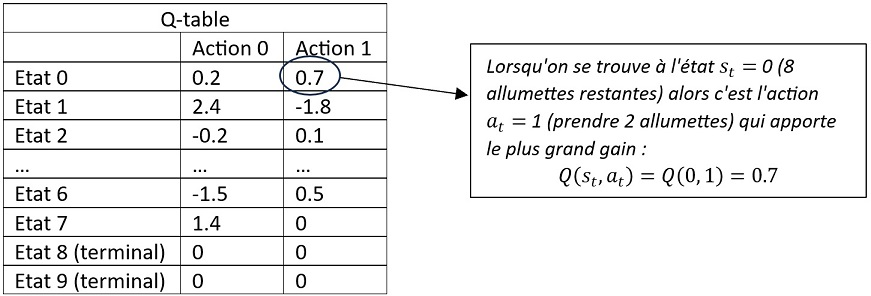

Initialement, la Q-table ne contiendra que des `0` et pourrait donc être initialisée dans un programme de la façon suivante : `Q = [[0,0], [0,0], [0,0], ...]`

Au fur et à mesure des parties, l'algorithme va actualiser les valeurs `Q[etat][action]`, qu'on notera `Q[s][a]`, de cette table en considérant pour chaque état $s$ et chaque action $a$ :
- d'une part la récompense associée à l'action effectuée : *si l'action conduit à la victoire de l'agent alors elle doit être récompensée, mais si elle conduit à la victoire de l'adversaire elle doit être punie.*
- d'autre part l'écart entre le gain à l'état $s_t$  et le gain maximum que l'agent pourrait espérer obtenir à l'état $s_{t+1}$ lors de sa prochaine action $a_{t+1}$ : *si, lors de sa prochaine action, l'agent se trouve dans un état favorable pour sa victoire alors cela signifie que l'action prise était un bon choix.*

On pourrait schématiser ce processus ainsi :




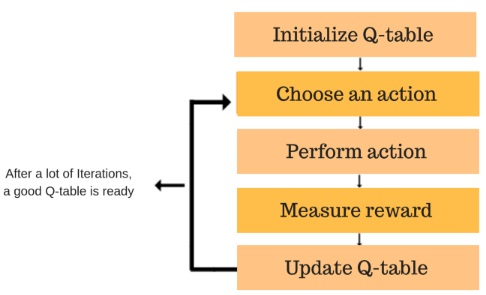

Un exemple explicatif à partir de la Q-table :
- Imaginons qu'à un instant $t$ il ne reste que 5 allumettes : l'agent se trouve dans l'état $s_t = 3$ et choisit l'action $a_t=1$ (retirer 2 allumettes)
- Cette action n'apporte pas de récompense ni de punition immédiate (car la partie n'est pas finie).
- Lorsque l'adversaire joue, il choisit de retirer 1 allumette : il en reste donc 2 (état $s_{t+1}=6$).
- Lorsque l'agent joue à nouveau, il regarde la meilleure action $a_{t+1}$ à effectuer : pour cela il cherche dans sa Q-table la valeur de $a_{t+1}$ pour laquelle `Q[stp1][atp1]` est la plus élevée. Il s'agit de $Q(6, 1) = 0.5$, il choisira donc d'effectuer l'action 1 (retirer 2 allumettes).
- Cette dernière action lui accordera la victoire (et donc une récompense) : il faut donc encourager l'action qui est à l'origine de cette victoire, c'est à dire celle qui avait été effectuée à l'état $s_t = 3$ : on augmente alors dans la Q-table la valeur de `Q[3][1]`.


On pourrait traduire cette idée par une première relation :

$Q(s_t, a_t) ← Q(s_t, a_t) + recompense + maxQ(s_{t+1}, a_{t+1}) - Q(s_t, a_t)$

A cela, on va cependant devoir ajouter 2 nouveaux facteurs :
- Un **facteur de réduction $𝛾$** (discount rate) compris entre 0 et 1 : plus il proche de 1, plus l'algorithme prendra en compte les récompenses futures associées à l'état $s_{t+1}$ et l'action $a_{t+1}$. S'il est proche de 0, il n'accordera aucune importance aux gains futurs qui découleront de l'action prise.
- Un **facteur d'apprentissage $α$** (learning rate) compris entre 0 et 1 : qui détermine à quel point une nouvelle information apprise doit être prise en compte pour actualiser la Q-table à chaque état. Plus il est proche de 1, plus la modification apportée à la table à chaque itération sera importante au point d'ignorer tout ce qu'il avait appris précédemment.

Dans la pratique, la détermination de $𝛾$ et de $α$ dépend du problème et vient avec l'expertise du métier. L'autre solution est de les tester jusqu'à trouver des valeurs satisfaisantes.

On aboutit finalement à la fonction Q suivante permettant la mise à jour de la Q-table :
\begin{align}
\mathbf{Q(s_t, a_t) ← Q(s_t, a_t) + α[recompense + 𝛾.maxQ(s_{t+1}, a_{t+1}) - Q(s_t, a_t)]}
\end{align}



📌**A votre tour !**
> Un programme incomplet vous est fourni ci-dessous (celui-ci est également fourni dans le fichier `nim_Qlearn.py` si vous souhaitez l'exécuter dans un environnement extérieur).
- Exécutez le programme une première fois pour constater qu'il ne fonctionne pas correctement (notez que vous pouvez exécuter jusqu'à 100 parties d'un coup désormais). A quoi le voyez-vous ?
  
Plusieurs informations n'ont pas été renseignées dans ce programme :
>- Le taux d'apprentissage $α$ et le facteur de réduction $𝛾$ n'ont pas été renseignés
>- La valeur $ε$ pour l'exploration / exploitation n'a pas été renseignée
>- La mise à jour de la Q-table n'a pas été saisie

Prenez le temps de parcourir ce programme pour retrouver les éléments abordés dans l'explication précédente.

Pouvez-vous notamment expliquer :  
>- L'intérêt de l'instruction : `action = Q[st].index(max(Q[st]))`
>- L'intérêt de l'instruction : `at = decision(st, Q, eps)`
>- Quelle est la politique d'attribution des récompenses ?

>Compléter le programme en mettant à jour la Q-table (Si vous n'y parvenez pas, demandez de l'aide aux intervenants).  
>Tester ensuite des valeurs pour $α$, $𝛾$ et ε jusqu'à ce que vous en trouviez pour lesquelles l'agent apprend.





In [ ]:
import random
import numpy as np


""" ################ Programme principal : jeu + renforcement ################# """
""" ################  Jeu pour 8 allumettes ################################### """

#Q-table initiale :
Q = [[0, 0] for i in range(10)]    #On rajoute les 2 états terminaux supplémentaires, qui correspondent à une fin de partie. Ils n'interviendront pas.
                                   #Ils n'interviendront pas directement et leur valeur restera à 0 (mais ils allègent l'écriture du programme).

def afficheQtable(Q, compteur_partie):
    """ Réalise un affichage de la Q table et de la politique gagnante"""
    partie = "partie" if compteur_partie == 1 else "parties"
    print(f"Etat de la Q table après {compteur_partie} {partie} :")
    for i in range(8):
        allu = "allumette " if i == 7 else "allumettes"
        print(f"{8-i} {allu} : prendre {np.argmax(Q[i]) +1} allumette(s) ; Q[{i}] = {np.round(Q[i], 3)}")


def decision(s, Q, eps):
    """ Renvoie le nombre d'allumettes à enlever.
    Ce nombre peut être déterminé :
        - Par exploration: dans ce cas il est tiré au hasard
        - Par exploitation de la Q-table : dans ce cas on choisit le nombre offrant la meilleure récompense
    """
    if s == 7:         #Dans l'état 7 il ne reste qu'une seule allumette
        action = 0
    elif random.randint(0,100) <= eps:      #Exploration aléatoire eps% du temps
        action = random.randint(0, 1)       #Correspond au nombre d'allumettes tirées au hasard - 1
    else:                                   #Exploitation de la Q table : le choix le plus récompensé sera fait
        action = Q[s].index(max(Q[s]))      #Retrait du nombres d'allumettes offrant le plus de récompense
    return action


def jeu():
    """ La fonction principale lance l'apprentissage 1 fois, puis il est possible
    de choisir le nombre de périodes.
    Il est intéressant de modifier les hyperparamètres lr, fr et eps,
    pour constater comment se comporte l'algorithme
    """
    alpha = 0             #Facteur d'apprentissage - learning rate
    gamma = 0             #Facteur de réduction - discount rate
    eps = 0               #Pourcentage de choix d'exploration (versus exploitation)
    recomp = 1            #Valeur de la récompense/punition
    compteur_partie = 0
    nb_parties_a_jouer = 1
    while nb_parties_a_jouer != 0:
        st = 0          #st est l'état à l'instant t : il correspond donc au verre sur lequel on se trouve
        while st < 8:
            at = decision(st, Q, eps)  #at vaut 0 (pour 1 allumette prise) ou 1 (pour 2 allumettes prises) avec politique eps-greedy
            stp1 = st + at + 1         #Passage à l'état suivant au temps t + 1
            if stp1 >= 8:              #L'action at sera récompensée car elle a permis d'enlever la dernière allumette
                r = recomp
            else:
                action_adverse = decision(stp1, Q, 0)    #Tour de la machine 2 : celle-ci adopte toujours la meilleure stratégie
                stp1 = stp1 + action_adverse + 1
                if stp1 >= 8:       #Si l'adversaire gagne alors l'action qui a conduit à cette situation est punie.
                    r = -recomp
                else:
                    r = 0                   #Personne n'a gagné, tout peut encore se jouer !
            atp1 = decision(stp1, Q, 0)     #Action effectuée selon la meilleure stratégie à l'état st+1
            ### -->  Mise à jour de la Q-table ! <--
            st = stp1
        compteur_partie += 1
    ##### fin de la partie ######

    ############ continuer ? #################
        nb_parties_a_jouer -= 1
        if nb_parties_a_jouer == 0:
            afficheQtable(Q, compteur_partie)
            another_go = input("\nCombien de nouvelles parties voulez-vous relancer (0-100) ? ")
            while not another_go.isdigit() or not 0 <= int(another_go) <= 100:
                print("\nChoix invalide. Recommencez !")
                another_go = input("\nCombien de nouvelles parties voulez-vous lancer (0-100) ? ")
            nb_parties_a_jouer = int(another_go)

    ############## Récapitulatif en fin d'entrainement ###################
    print("######## Fin d'entrainement  ######")

print("Fonctions et paramètres correctement chargés")

In [ ]:
jeu()

📌**Discussion :**
>- Comment se comporte le Q-learner lorsque $α=0$ ? Et quand $α=1$ ? Et quand $γ=0$ ? Et quand $\gamma=1$ ?
>- Dans la Q-table, quelles sont les valeurs actualisées en premier ?  Pourquoi ?
>- Quelles sont les informations qui vous permettent de dire que l'apprentissage a réussi ?
>- Quelles similitudes/différences relevez-vous entre un apprentissage effectué par une machine et celui effectué par un être humain ?


En conclusion:
---
Si vous avez réalisé et compris cette activité, alors vous avez découvert et manipulé les notions essentielles de l'apprentissage par renforcement :
- Le mécanisme de récompense qui permet à une machine d'apprendre
- Les effets des actions effectuées par l'agent et la notion d'état de l'environnement
- Le principe et l'intérêt d'une politique ɛ-greedy
- Le rôle des 2 hyperparamètres principaux du Q-learning que sont le taux d'apprentissage et le facteur de réduction
- Le fonctionnement général d'une Q-table et le mécanisme d'actualisation de ses valeurs

Ce que vous avez réalisé ici avec le jeu de Nim pourrait être étendu à de nombreux domaines (par exemple en modifiant les dimensions de la Q-table, en redéfinissant les états et les actions, ainsi que la politique de décision, en modifiant les valeurs des paramètres, etc.) mais l'idée est transposable.
